# Straight channel data

I performed some straight channel experiment. The goal is to test if identical channels in the same microtubule/kinesin system exhibit the same magnitude of flow rate. In this notebook, I summarize the result.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
import os

In [5]:
folder = r"C:\Users\liuzy\Documents\AN\straight_channels\Flow_rate"

fr_list = []
offset = 0
for i in range(4):
    dataDir = os.path.join(folder, "{:02d}.csv".format(i))
    flowrate = pd.read_csv(dataDir)
    maxt = flowrate["t"].max()
    flowrate["t"] += offset
    fr_list.append(flowrate)
    offset += maxt

combined = pd.concat(fr_list)

Text(0, 0.5, 'flow rate (um$^2$/s)')

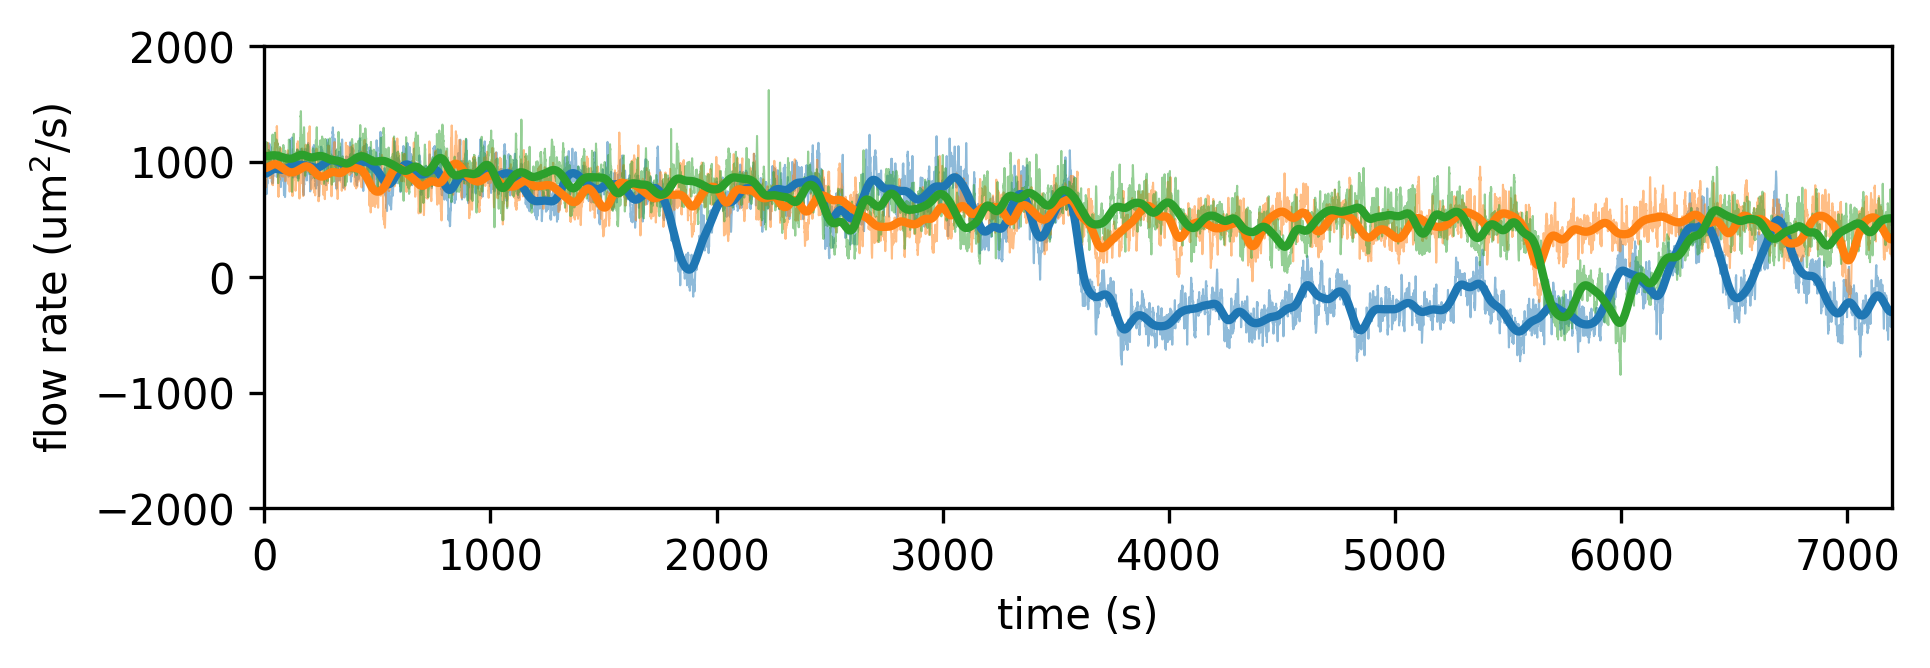

In [11]:
fig, ax = plt.subplots(figsize=(7,2), dpi=300)
colors = plt.get_cmap("tab10")
ax.plot(combined["t"], combined["A"], alpha=0.5, lw=0.5, color=colors(0))
ax.plot(combined["t"], combined["B"], alpha=0.5, lw=0.5, color=colors(1))
ax.plot(combined["t"], combined["C"], alpha=0.5, lw=0.5, color=colors(2))
ax.plot(combined["t"], gaussian_filter1d(combined["A"], sigma=50), lw=2, color=colors(0))
ax.plot(combined["t"], gaussian_filter1d(combined["B"], sigma=50), lw=2, color=colors(1))
ax.plot(combined["t"], gaussian_filter1d(combined["C"], sigma=50), lw=2, color=colors(2))
ax.set_xlim([0, offset])
ax.set_ylim([-2000, 2000])
ax.set_xlabel("time (s)")
ax.set_ylabel("flow rate (um$^2$/s)")

Text(0, 0.5, 'absolute flow rate (um$^2$/s)')

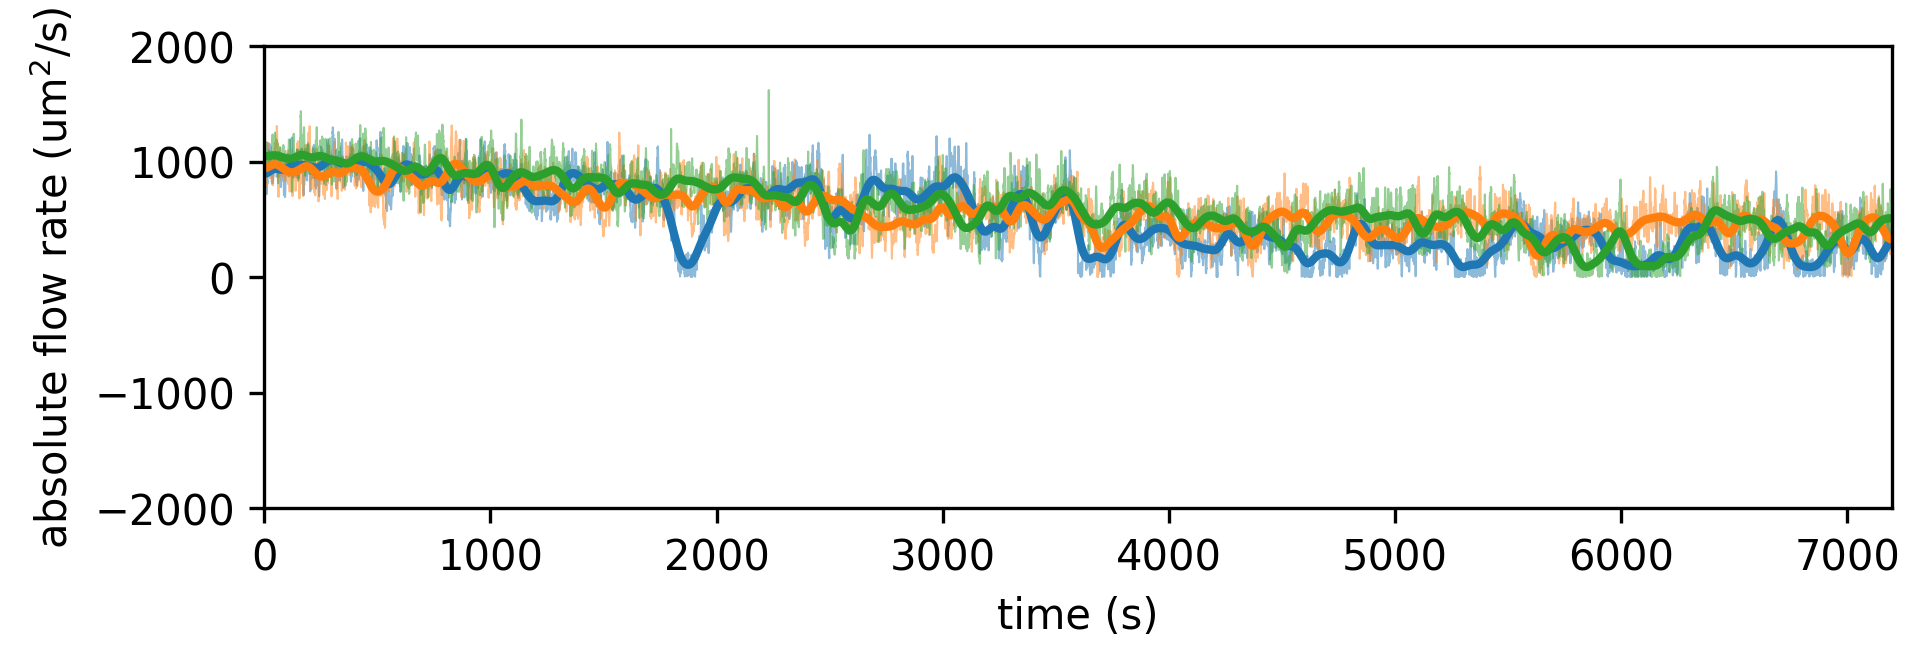

In [13]:
fig, ax = plt.subplots(figsize=(7,2), dpi=300)
colors = plt.get_cmap("tab10")
ax.plot(combined["t"], combined["A"].abs(), alpha=0.5, lw=0.5, color=colors(0))
ax.plot(combined["t"], combined["B"].abs(), alpha=0.5, lw=0.5, color=colors(1))
ax.plot(combined["t"], combined["C"].abs(), alpha=0.5, lw=0.5, color=colors(2))
ax.plot(combined["t"], gaussian_filter1d(combined["A"].abs(), sigma=50), lw=2, color=colors(0))
ax.plot(combined["t"], gaussian_filter1d(combined["B"].abs(), sigma=50), lw=2, color=colors(1))
ax.plot(combined["t"], gaussian_filter1d(combined["C"].abs(), sigma=50), lw=2, color=colors(2))
ax.set_xlim([0, offset])
ax.set_ylim([-2000, 2000])
ax.set_xlabel("time (s)")
ax.set_ylabel("absolute flow rate (um$^2$/s)")